In [1]:
from src.utils import create_square, plot_function, plot_vector_field
from src.models.dynamics_models import BidomainModel
from src.models.cell_models import *
from typing import Callable
import numpy as np
import ufl

In [2]:
domain = create_square(32, 32)
cell_model = Noble(
    domain=domain,
    m_0=1.0,
    h_0=0.0,
    n_0=0.5,
)


class Model(BidomainModel):
    def initial_V_m(self) -> tuple[Callable, float, float]:
        return lambda x: x[0] ** 2 + x[1] ** 2 < 0.2**2, 0, -84

    # def ischemia(self):
    #    return (
    #        lambda x: (x[0] - 0.5) ** 2 + (x[1] - 0.5) ** 2 < 0.5**2,
    #        self.M_i / 10,
    #        self.M_e / 10,
    #    )


model = Model(domain)

### Solve the equations with given parameters

In [3]:
model.solve(
    T=1000,
    steps=3000,
    cell_model=cell_model,
    gif_name="demo.gif",
    signal_point=[0.2, 0.2, 0.0],
)

Solving problem: 100%|██████████| 3000/3000 [03:46<00:00, 13.24it/s]


### Plotting a final plot of transmembrane potential

In [4]:
plot_function(model.V_m_n)

Widget(value='<iframe src="http://localhost:42679/index.html?ui=P_0x7f019c08ddd0_0&reconnect=auto" class="pyvi…

### Plotting a transmembrane potential in a given signal point

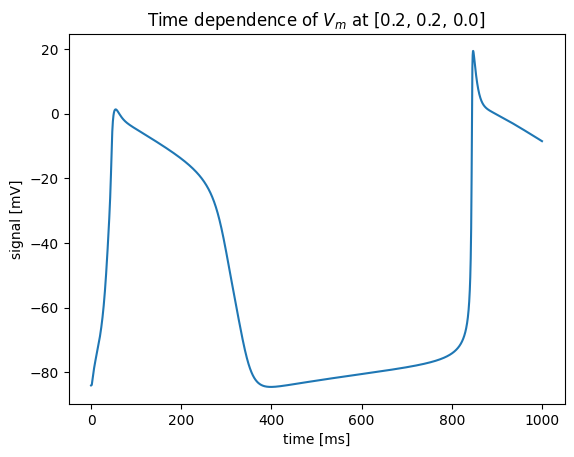

In [5]:
model.plot_signal()

### Plotting a transmembrane potential solution of a cell model

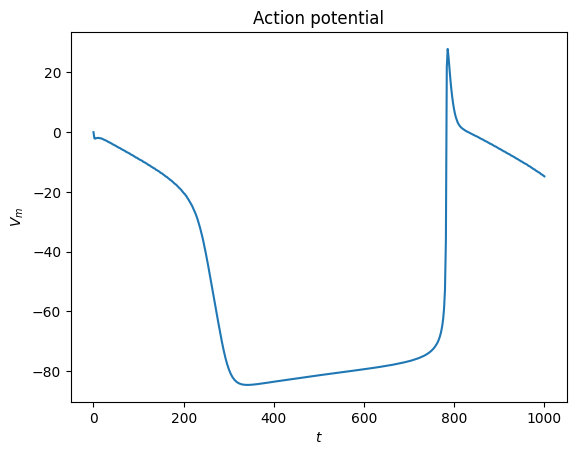

U trenutku t=1600 V, m, h i n su: 6.224732814517232 0.9740910385846007 0.0013421076622682879 0.4031287813479898


In [6]:
cell_model.visualize(1000, 0, 1, 0.0, 0.5)

In [7]:
plot_vector_field(domain, lambda x: [x[0], x[0], 0])

Widget(value='<iframe src="http://localhost:42679/index.html?ui=P_0x7f01880ee690_1&reconnect=auto" class="pyvi…